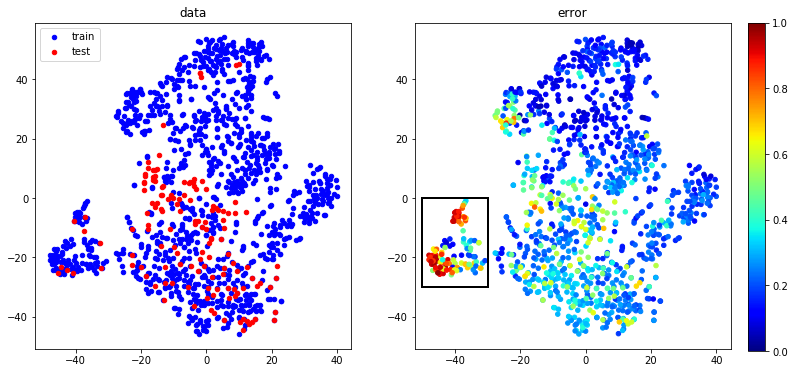

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable  # 自动划分 axes
import numpy as np


def vis_data_dist():  # N,C
    X_tsne = np.load(r'C:\Users\Shuai\Desktop\Codes\DeepGlobe\cluster\X_tsne.npy')

    # train/test error scores
    train_errors = np.load(r'C:\Users\Shuai\Desktop\Codes\DeepGlobe\cluster\train_errors.npy')
    test_errors = np.load(r'C:\Users\Shuai\Desktop\Codes\DeepGlobe\cluster\test_errors.npy')
    target_error = np.hstack((train_errors, test_errors))

    # train/test tag 0/1
    target_split = np.array([0] * len(train_errors) + [1] * len(test_errors))

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    s = 20

    plt.subplot(1, 2, 1)
    mask = target_split == 0
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c='b', s=s, label='train')
    mask = ~ mask  # np 数组取反
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c='r', s=s, label='test')
    plt.title('data')
    plt.legend(loc='upper left')

    plt.subplot(1, 2, 2)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=target_error, s=s, cmap='jet')
    plt.title('error')
    
    
    # x < -30
    x, y, w, h = -50, -30, 20, 30
    plt.gca().add_patch(plt.Rectangle(xy=(x, y),
                                  width=w, height=h,
                                  edgecolor='k',
                                  fill=False, linewidth=2))

    # 手工调整位置
    plt.subplots_adjust(right=0.93)  # 调节前面已画子图占比
    plt.colorbar(cax=plt.axes([0.95, 0.12, 0.02, 0.76]))  # l,b,w,h
    plt.clim([0, 1])
    
    # 自动设置比例
    # divider = make_axes_locatable(plt.gca())  # 当前图的 不是全图
    # cax = divider.append_axes('right', size='2%', pad=0.1)
    # plt.colorbar(cax=cax)

    plt.show()

    
vis_data_dist()